# Data cleaning and transformation


 Basic data cleaning and and data prepration that would help us to visualise and get a better idea of the data and also help us analyse the data better

In [29]:
import pandas as pd

In [28]:
df = pd.read_csv('/content/Amazon.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5847,2020-08-10,3170.310059,3172.510010,3101.520020,3148.159912,3148.159912,3167300
5848,2020-08-11,3113.199951,3159.219971,3073.000000,3080.669922,3080.669922,3718100
5849,2020-08-12,3108.000000,3174.389893,3101.419922,3162.239990,3162.239990,3527200
5850,2020-08-13,3182.989990,3217.520020,3155.000000,3161.020020,3161.020020,3149000


In [30]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5.852000e+03
mean,377.469557,381.737827,372.815253,377.500736,377.500736,7.512673e+06
std,596.291033,602.615299,589.226694,596.287464,596.287464,7.278144e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.995000,38.590000,37.247501,37.950001,37.950001,3.681975e+06
50%,83.699997,85.029999,82.055000,83.602501,83.602501,5.652850e+06
75%,360.852501,365.794991,357.877510,362.217506,362.217506,8.517450e+06
max,3251.060059,3344.290039,3165.429932,3225.000000,3225.000000,1.043292e+08


In [32]:
#Convert 'Open' column to integers
df['Open'] = df['Open'].astype(int)
print(df['Open'])

0          2
1          1
2          1
3          1
4          1
        ... 
5847    3170
5848    3113
5849    3108
5850    3182
5851    3178
Name: Open, Length: 5852, dtype: int64


In [33]:
#Extract information from Volume column

# Calculate average volume
average_volume = df['Volume'].mean()

# Calculate maximum volume
max_volume = df['Volume'].max()

# Calculate minimum volume
min_volume = df['Volume'].min()

# Calculate total volume
total_volume = df['Volume'].sum()

# Print the extracted information
print('Average Volume:', average_volume)
print('Maximum Volume:', max_volume)
print('Minimum Volume:', min_volume)
print('Total Volume:', total_volume)

Average Volume: 7512673.188653451
Maximum Volume: 104329200
Minimum Volume: 487200
Total Volume: 43964163500


In [34]:
#Creating New Features

# Create a new feature 'price_range' by calculating the difference between high and low prices
df['price_range'] = df['High'] - df['Low']

# Create a new feature 'profit' by calculating the difference between closing and opening prices
df['profit'] = df['Close'] - df['Open']

# Create a new feature 'day_of_week' by extracting the day of the week from the 'date' column
df['date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Convert 'date' column to datetime format
df['day_of_week'] = df['date'].dt.day_name()


# Print the DataFrame with the new features
print(df.head())


         Date  Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15     2  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16     1  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19     1  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20     1  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21     1  1.645833  1.375000  1.427083   1.427083  18853200   

   price_range    profit       date day_of_week  
0     0.572917 -0.041667 1997-05-15    Thursday  
1     0.270834  0.729167 1997-05-16      Friday  
2     0.145833  0.708333 1997-05-19      Monday  
3     0.114583  0.635417 1997-05-20     Tuesday  
4     0.270833  0.427083 1997-05-21   Wednesday  


In [35]:
df['Date']= pd.to_datetime(df['Date'])
df['Date']

0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
5847   2020-08-10
5848   2020-08-11
5849   2020-08-12
5850   2020-08-13
5851   2020-08-14
Name: Date, Length: 5852, dtype: datetime64[ns]

In [36]:
df['Year']= pd.DatetimeIndex(df.Date).year
df['Month']= pd.DatetimeIndex(df.Date).month
df['Weekday']= pd.DatetimeIndex(df.Date).weekday
df.groupby('Year').mean()
df.groupby('Month').mean()

<ipython-input-36-3f18af05fa52>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Year').mean()
<ipython-input-36-3f18af05fa52>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Month').mean()


,Open,High,Low,Close,Adj Close,Volume,price_range,profit,Year,Weekday
Month,,,,,,,,,,
1,361.626609,366.595323,357.638901,362.618802,362.618802,8.844152e+06,8.956422,0.992193,2009.040773,2.120172
2,365.714286,370.855870,361.468019,366.173066,366.173066,7.736001e+06,9.387851,0.458780,2009.000000,2.102041
3,366.316103,371.882899,361.819272,367.402210,367.402210,6.518901e+06,10.063626,1.086107,2008.948310,1.976143
4,396.705882,402.105233,392.003112,397.460031,397.460031,7.977403e+06,10.102120,0.754149,2009.018908,1.926471
5,407.951710,412.574027,404.500890,408.863696,408.863696,6.533829e+06,8.073137,0.911986,2008.760563,2.106640
6,413.914230,418.585135,409.818708,414.418703,414.418703,6.795501e+06,8.766427,0.504472,2008.491228,1.990253
7,452.033399,457.806658,446.232679,452.492651,452.492651,8.384323e+06,11.573979,0.459252,2008.500982,1.992141
8,391.373796,395.387097,387.831699,391.685127,391.685127,6.152311e+06,7.555398,0.311331,2008.279383,2.009634
9,338.152688,341.862230,334.808183,338.522571,338.522571,7.308702e+06,7.054047,0.369883,2008.015054,2.088172


In [37]:
df.set_index('Date', inplace=True)

# Exploratory Analysis and Visualization

Performing analysis and visualisation of the data to understand and get more insights on the data set

In [38]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**The graph below gives an insight about how the opening stock price of Amazon Inc. has increased over the years from 1997 to 2020**

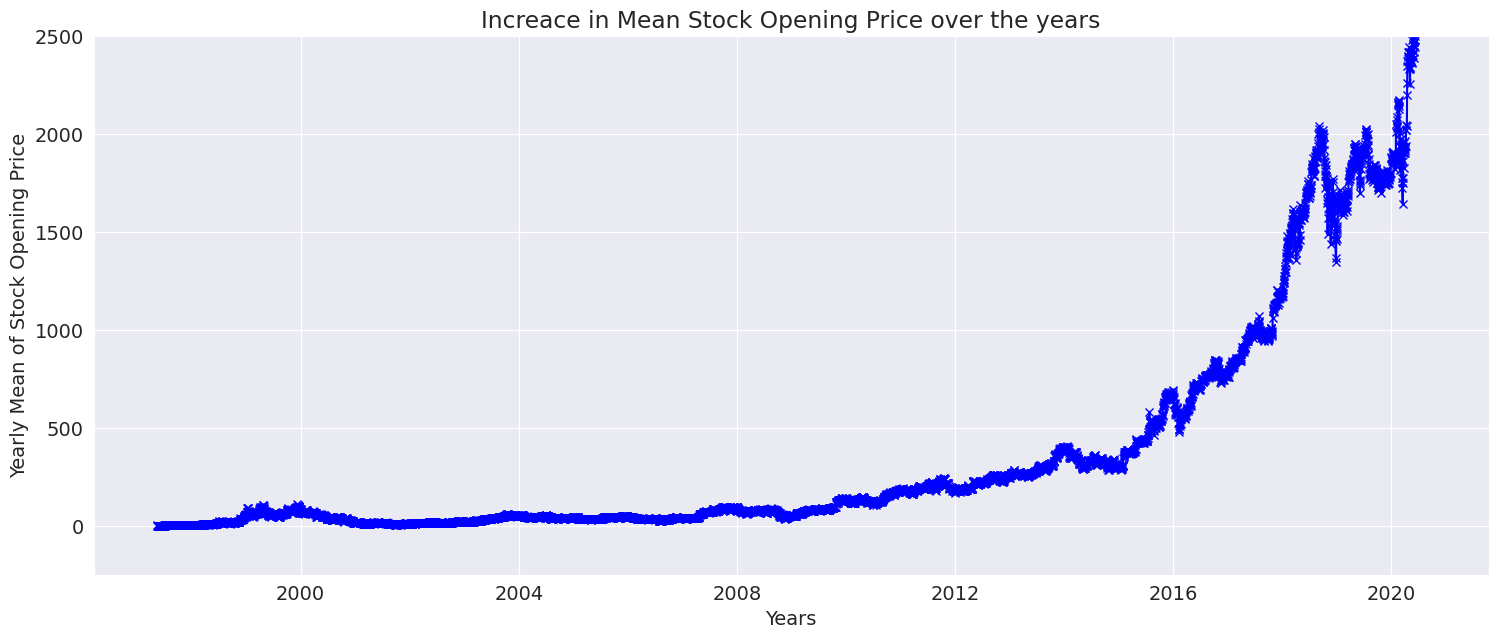

In [39]:
plt.plot(df.Open, 'x-b')
plt.ylim(-250,2500)
plt.xlabel('Years')
plt.ylabel('Yearly Mean of Stock Opening Price')
plt.title('Increace in Mean Stock Opening Price over the years');

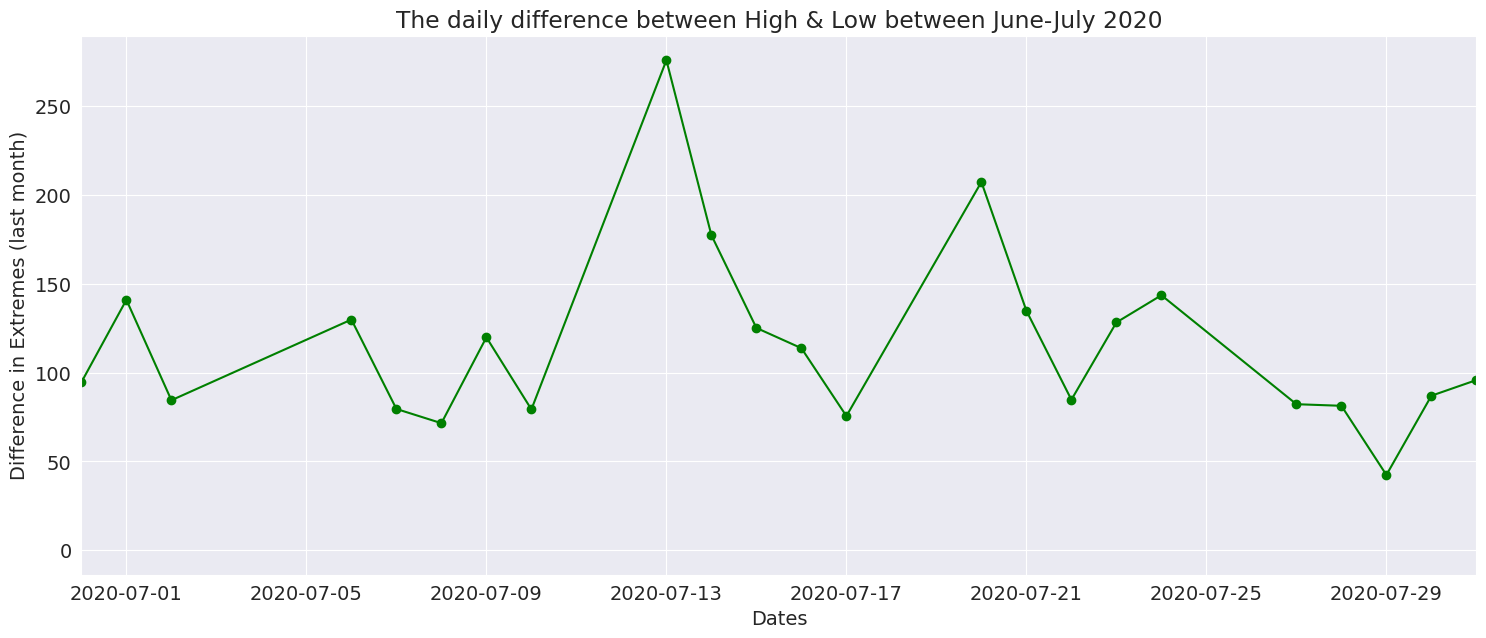

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the x-axis limits to datetime objects
start_date = pd.to_datetime('2020-06-30')
end_date = pd.to_datetime('2020-07-31')

plt.plot(df['price_range'], 'o-g')
plt.xlim(start_date, end_date)
plt.ylabel('Difference in Extremes (last month)')
plt.xlabel('Dates')
plt.title('The daily difference between High & Low between June-July 2020')

plt.show()


**The graph below shows the frequency of distribution of closing price of the stock**

<ipython-input-41-1625ab56bcf3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Close)


<Axes: xlabel='Close', ylabel='Density'>

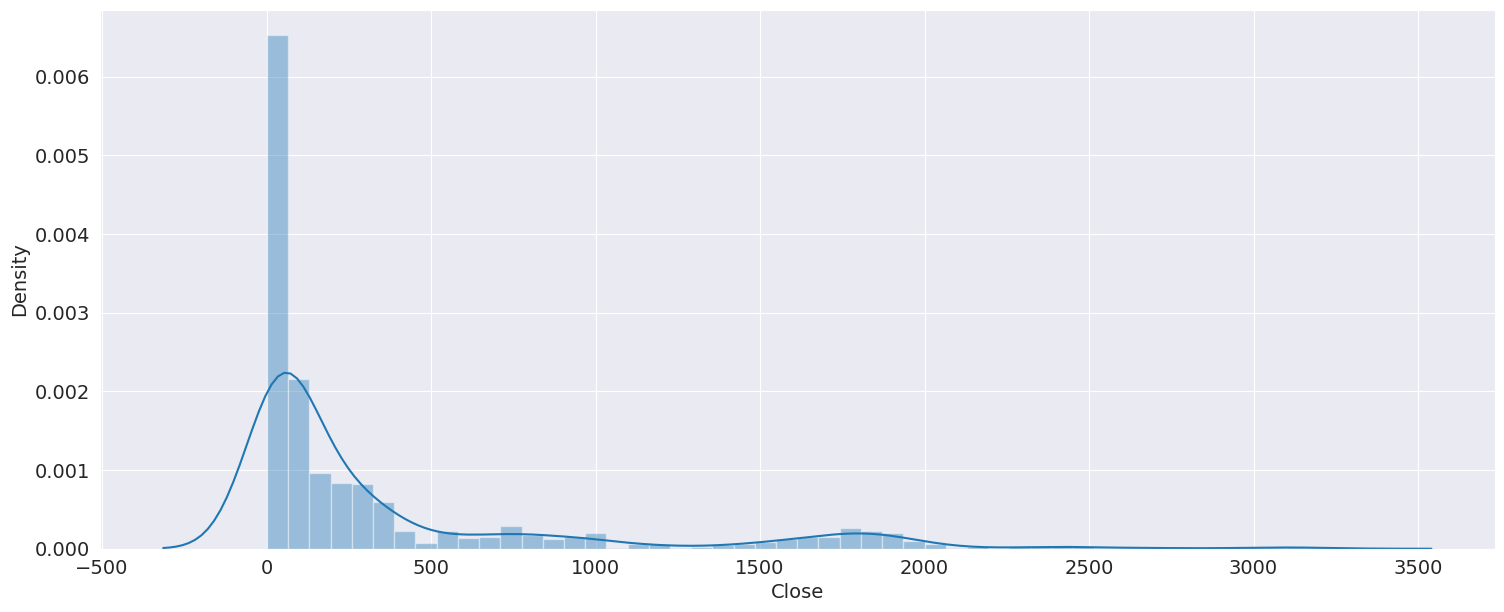

In [41]:
sns.distplot(df.Close)

**The graph gives insight about the stock prices in the month of August**

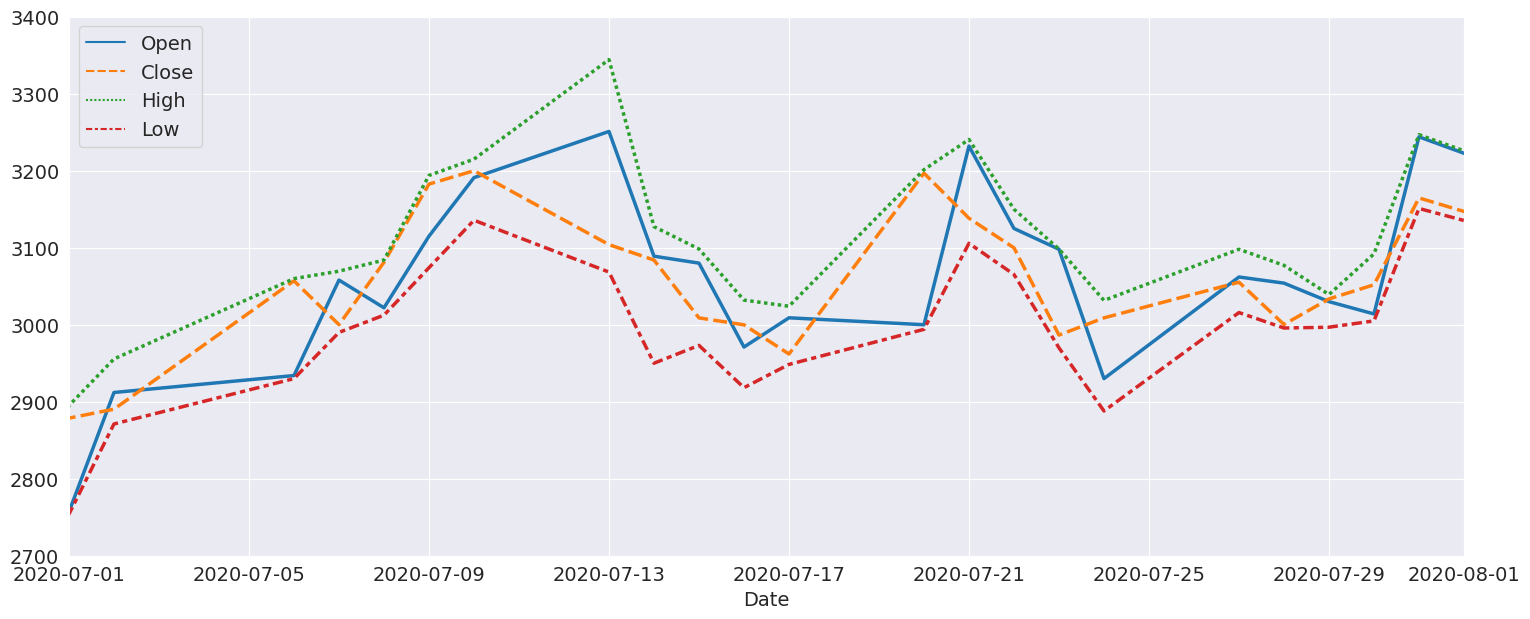

In [15]:
df = df[['Open','Close','High','Low']]

# Convert the x-axis limits to datetime objects
start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2020-08-01')

sns.lineplot(data=df, linewidth=2.5)
plt.ylim(2700, 3400)
plt.xlim(start_date, end_date)

plt.show()

# Answering Questions by Analysing

**Q1: When were the Amazon stock prices affected by the financial crisis of 2007-2008**

In [16]:
df_2006 = df['2006-01-01':'2006-12-31']
df_2007 = df['2007-01-01':'2007-12-31']
df_2008 = df['2008-01-01':'2008-12-31']
df_2009 = df['2009-01-01':'2009-12-31']

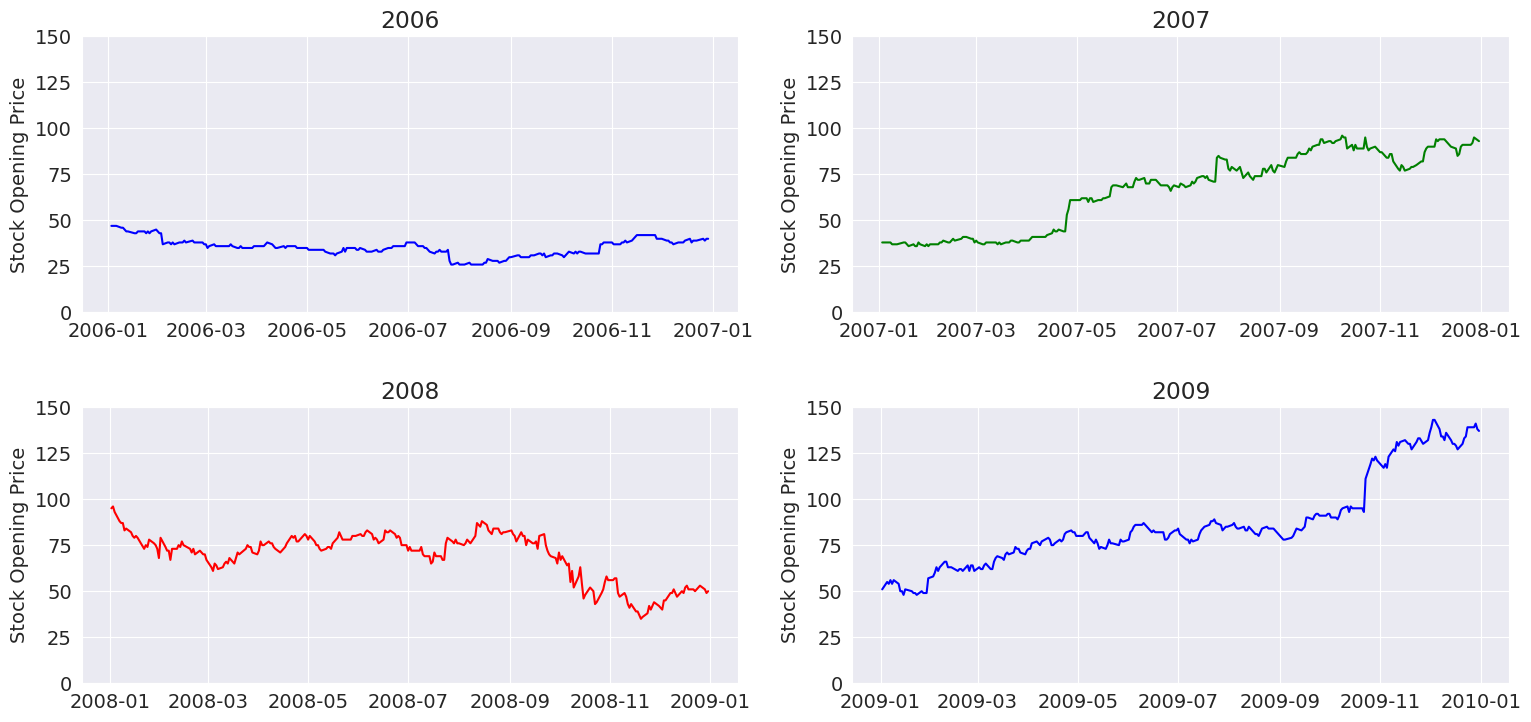

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout(pad=3.0);
#2006
axes[0,0].plot(df_2006.Open,'b')
axes[0,0].set_ylim([0,150])
axes[0,0].set_title('2006')
axes[0,0].set_ylabel('Stock Opening Price');
#2007
axes[0,1].plot(df_2007.Open, 'g')
axes[0,1].set_ylim([0,150])
axes[0,1].set_title('2007')
axes[0,1].set_ylabel('Stock Opening Price');
#2008
axes[1,0].plot(df_2008.Open, 'r')
axes[1,0].set_ylim([0,150])
axes[1,0].set_title('2008')
axes[1,0].set_ylabel('Stock Opening Price');
#2009
axes[1,1].plot(df_2009.Open, 'b')
axes[1,1].set_ylim([0,150])
axes[1,1].set_title('2009')
axes[1,1].set_ylabel('Stock Opening Price');

The Financial crises of 2007-2008 had started around February of 2007. In case of Amazon, as we can see the yearly graphs the stock prices increased through the year 2007 with minor downs, but eventually the prices went down till the end of the year of 2008

**Q2: What was the impact of the COVID 19 to the stock prices of Amazon**

In [18]:
df_corona = df['2020-03-11':]

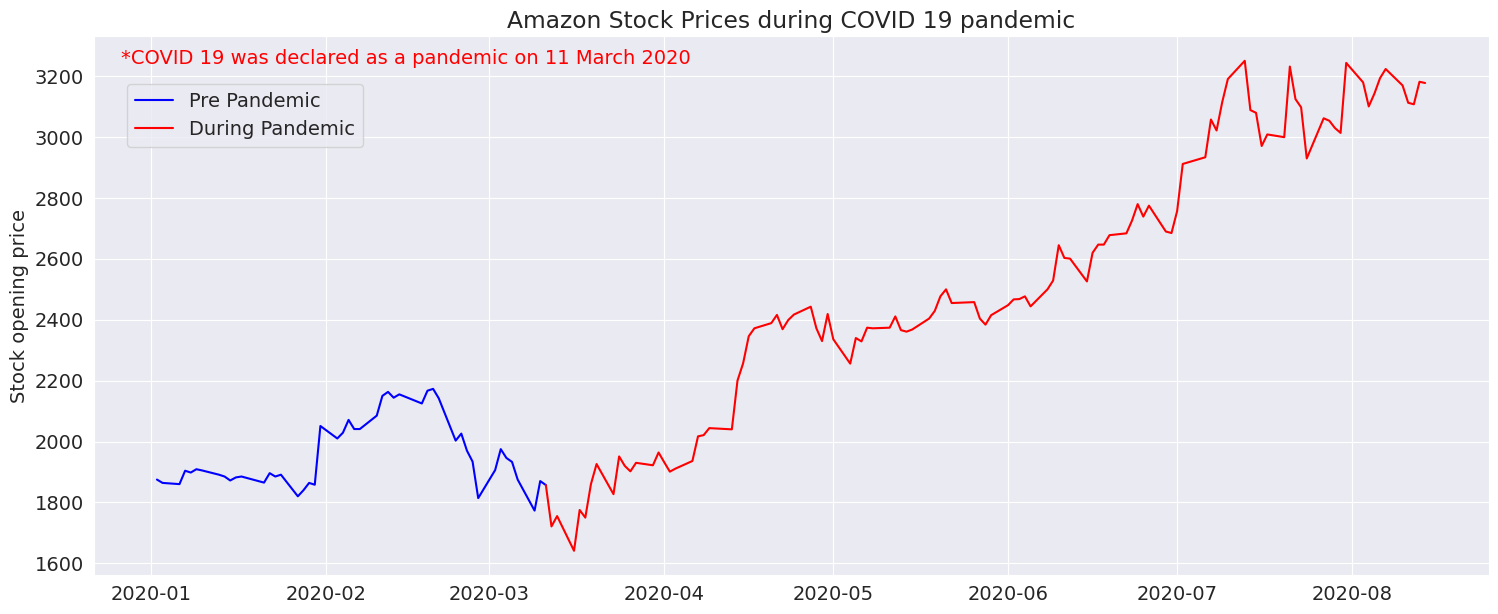

In [19]:
plt.plot(df['2020-01-01':'2020-03-11'].Open,'b')
plt.plot(df_corona.Open,'r')
plt.legend(['Pre Pandemic', 'During Pandemic'], bbox_to_anchor=(0.2, 0.93))
plt.figtext(.14, .84, "*COVID 19 was declared as a pandemic on 11 March 2020", c='red')
plt.title('Amazon Stock Prices during COVID 19 pandemic')
plt.ylabel('Stock opening price');

The COVID-19 out break affected a lot of companies in different ways. It mostly broke out worldwide in February and the on 11th March 2020, World Health Organisation (WHO) declared it as a global pandemic.

Imapact on Amazon
As you can see in the graph, when the outbreak started around February the stock prices went started going down after an initial rise. It continued to go down but then around mid March it started coming back up. The price has continued to go up and has reached a peak price. The Amazon stock prices after a inital low, had a good impact as the useage of online shopping increased a lot as the physical shopping became dangerous.

**Q3: What is the frequency distribution of the average daily change in price in the last 5 years?**

In [22]:
df['open_close_diff']=df['Open'] - df['Close']
#amazon_stock_df.groupby('Month').mean()
df['open_close_diff'].describe()

<ipython-input-22-92fb36ce9c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_close_diff']=df['Open'] - df['Close']


count    5852.000000
mean       -0.491509
std        11.623898
min      -196.840088
25%        -1.889999
50%        -0.490000
75%         0.779999
max       147.000000
Name: open_close_diff, dtype: float64

<ipython-input-23-cbd5e685acfa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['2015-08-01':].open_close_diff)


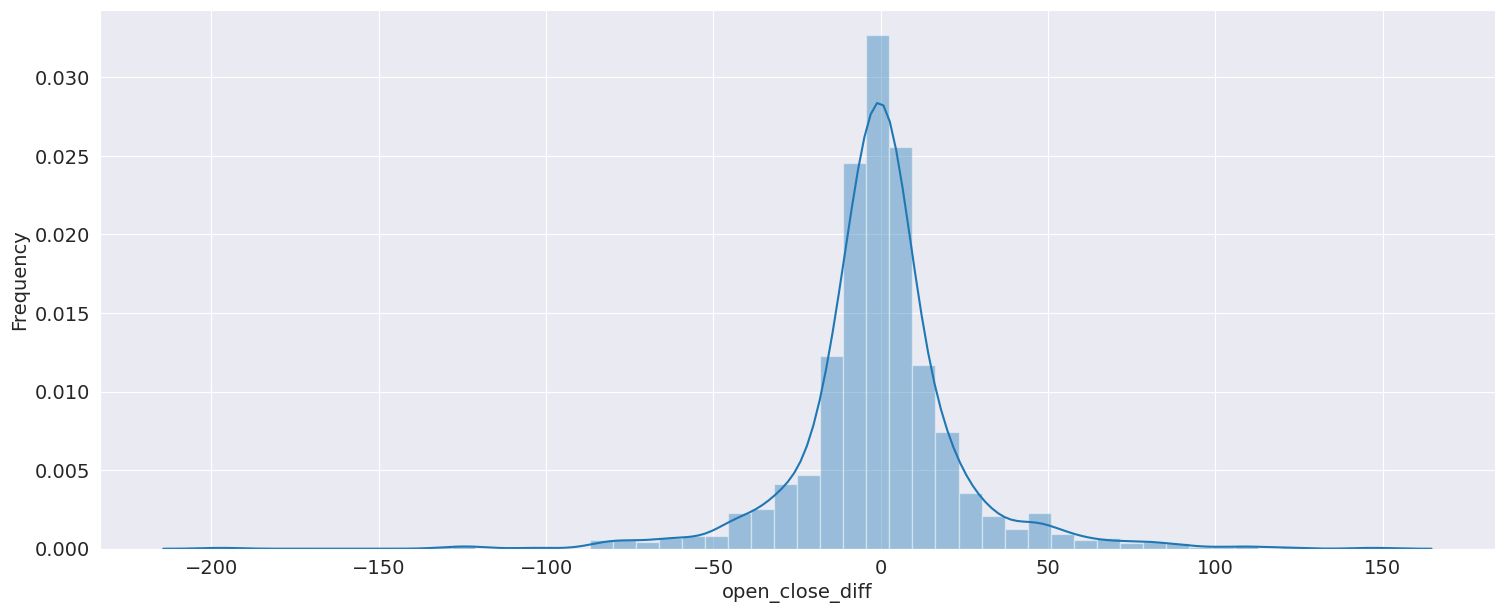

In [23]:
sns.distplot(df['2015-08-01':].open_close_diff)
plt.ylabel('Frequency');

The distribution of daily difference in stock prices that is the difference in opening and closing prices, over the last 5 years, can be seen in the graph. As we can see majority of the differences are around 0, hence mostly the there is not much difference between the daily opening and closing price. We can also see that the frequency of the difference being positive is more, this tell us that the frequency of rise in price at the closing is less than the frequency of opening price being higher than the closing price.

**Q4: What is the impact of crises on the volume of Amazon stock being traded?**

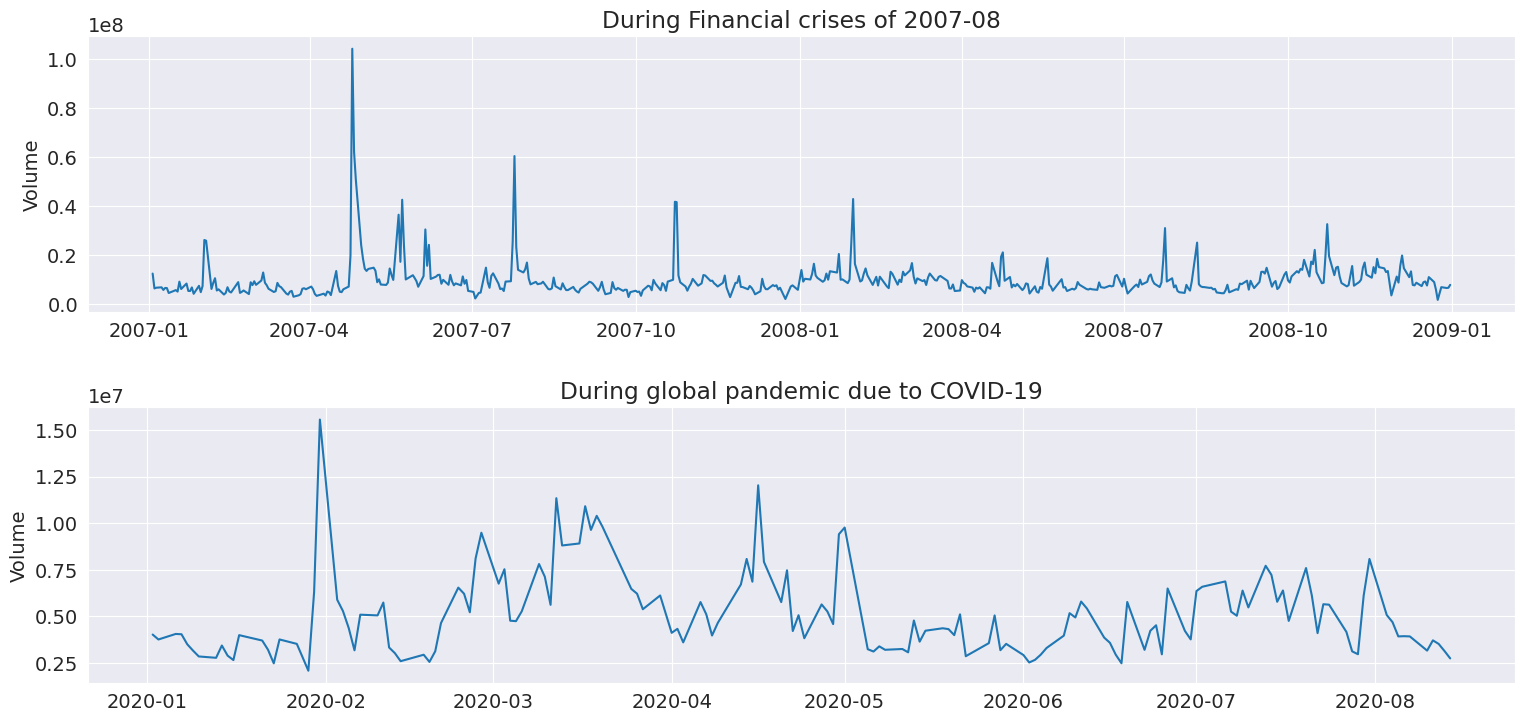

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
fig.tight_layout(pad=3.0)
axes[0].plot(df['2007-01-01':'2008-12-31'].Volume)
axes[0].set_title('During Financial crises of 2007-08')
axes[0].set_ylabel('Volume');
axes[1].plot(df['2020-01-01':].Volume)
axes[1].set_title('During global pandemic due to COVID-19')
axes[1].set_ylabel('Volume');

The crises always have an effect on the stock market, as people try to predict the market movements and trade shares according to their predictions and hence the volume of stocks being traded logically gets always undergo a upheaval. This premise can be supported by the graphs above which represent the volume of Amazon stocks being traded during different crises.

In the graph, we can see that there is a hike in price in both the graphs around the time people start realizing that it is a crises. The Financial Crises officailly started in February but it was around March when people saw it as a pattern and started trading the stocks. In the case of Covid-19, the virus started spreading around in January and in February people realised that it is spreading quickly and the forseed a major Crises and started trading the stocks.

**Q5: How has the Highs and the lows been in the last few years?**

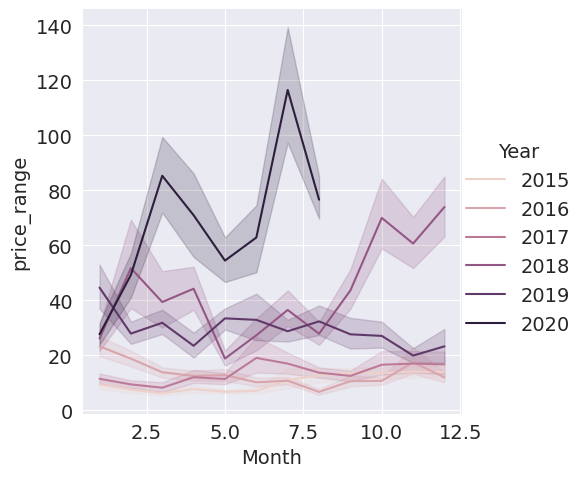

In [48]:
sns.relplot(x="Month", y="price_range", hue="Year", kind="line", data=df['2015-01-01':]);

The Price Range means the difference between the daily High and the low of the stock price. As we can see the pattern that the difference has been increasing over the years and that tells us that the company is on its growth period and the stock is quite volatile right now. The higher the difference the more growth of the stock price.

# Inferences and Conclusion



Amazon Inc is one of the biggest tech companies in the world and the stocks traded of the company are in millions. The company was started in 1994 and it became public 1997, after had a steady intital growth, the company in recent years has had an accelerated growth. The stock price has increased from 1.4 to 3,200.

The Analysis will give you an idea about how the company has grown over the years, how it is performing recently and how it has performed in financial crises. We have tried to simplify and represented the data through visualization for a more insightful understanding of the company's growth.

The conclusion that can be drawn from the analysis is that it is a company which is growing in a high accelerated pattern. The price have been a little volatile in between during recent time due to the pandemic, but the company ultimately is bound to be a top company and a stock worth investing in.